# Part I - (Exploratory Visual Analysis of the Ford Gobike System Dataset)
## by (Kazeem Adeyanju)

## Introduction
> The dataset for this project is the Ford Gobike system data. Ford Gobike is a model for equitable bike share access in the US and an exploration has been carried out on the dataset.
The original dataset contains the following columns before analysis:

>1. duration_sec
>2.  start_time
>3.  end_time
>4.   start_station_id
>5.  start_station_name
>6.  start_station_latitude
>7.  start_station_longitude
>8.  end_station_id
>9.  end_station_name
>10.  end_station_latitude
>11. end_station_longitude
>12. bike_id
>13. user_type
>14. member_birth_year
>15. member_gender
>16.  bike_share_for_all_trip




## Preliminary Wrangling


In [412]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [413]:
original_ford_bike = pd.read_csv('fordgobike_tripdata.csv')
original_ford_bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


## First we will make a Copy of our dataset

In [414]:
ford_bike = original_ford_bike.copy()

#What is the structure of our dataset?

In [415]:
ford_bike.shape

(183412, 16)

In [416]:
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#The above dataset structure shows there 183412 trips with 16 features


#What are the main features of our dataset?

#As seen above our dataset contains start time, start station,end station  and end time.
#These variables would be my focus as these times can help determine the time most...
#...trips occur, the busiest day of the week or month and the least used location among other things

## Univariate Exploration

#To begin our exploration. We need to see if our dataset are in the right datatype format

In [417]:
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#We will change our datatypes to the right formats for some variables. 

In [418]:
new_data_type = {'start_time': 'datetime64[ns]', 
        'end_time': 'datetime64[ns]',
        'start_station_id': 'object',
        'end_station_id': 'object',
        'start_station_latitude': 'object',
        'start_station_longitude':  'object',
        'end_station_latitude':  'object',
        'end_station_longitude':  'object',
         'bike_id': 'object',
         'user_type': 'category', 
         'member_birth_year': 'datetime64[ns]', 
         'member_gender':'category'}
ford_bike = ford_bike.astype(new_data_type)

In [419]:
#Lets test to confirm our new changes

ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  object        
 6   start_station_longitude  183412 non-null  object        
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  object        
 10  end_station_longitude    183412 non-null  object        
 11  bike_id                  183412 non-null  object        
 12  user_type       

#Now we have our time variables in the right datatype

### What features in the dataset can help support my investigation into my feature(s) of interest?

#The day of week, month of year, are features that can be of significant support...
#We can derive this from our time variables.

In [420]:
#Let's create a column for day of week each trip started

ford_bike['start_weekday'] = ford_bike['start_time'].dt.dayofweek

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

ford_bike['start_weekday'] = ford_bike['start_weekday'].apply(lambda x: days[x])

In [421]:
#Let's create another column for day of week each trip ended

ford_bike['end_weekday'] = ford_bike['end_time'].dt.dayofweek

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

ford_bike['end_weekday'] = ford_bike['end_weekday'].apply(lambda x: days[x])

In [422]:
ford_bike['start_weekday'].unique()

array(['Thurs', 'Weds', 'Tues', 'Mon', 'Sun', 'Sat', 'Fri'], dtype=object)

In [423]:
#ford_bike['start_weekday'].value_counts().sort_index().plot(kind= 'bar');

In [424]:
ford_bike['start_weekday'] = pd.Categorical(ford_bike['start_weekday'], categories=
    ['Mon','Tues','Weds','Thurs','Fri','Sat', 'Sun'],
    ordered=True)

In [425]:
ford_bike['start_weekday'].value_counts().sort_index()

Mon      26852
Tues     31813
Weds     29641
Thurs    35197
Fri      28981
Sat      15405
Sun      15523
Name: start_weekday, dtype: int64

In [426]:
#Let's create a column for year of Birth and Age from member birth year column

In [427]:
ford_bike['member_birth_year'] =ford_bike['member_birth_year'].astype(str)

In [428]:
ford_bike['year_of_birth'] =ford_bike['member_birth_year'].str[-4:]

In [429]:
ford_bike['year_of_birth'].unique()

array(['1984', 'NaT', '1972', '1989', '1974', '1959', '1983', '1988',
       '1992', '1996', '1993', '1990', '1981', '1975', '1978', '1991',
       '1997', '1986', '2000', '1982', '1995', '1980', '1973', '1985',
       '1971', '1979', '1967', '1998', '1994', '1977', '1999', '1987',
       '1969', '1963', '1976', '1964', '1965', '1961', '1968', '1966',
       '1962', '1954', '1958', '1960', '1970', '1956', '1957', '1945',
       '1900', '1952', '1948', '1951', '1941', '1950', '1949', '1953',
       '1955', '1946', '1947', '1931', '1943', '1942', '1920', '1933',
       '2001', '1878', '1901', '1944', '1928', '1934', '1939', '1930',
       '1902', '1910', '1938', '1927'], dtype=object)

In [430]:
ford_bike['start_weekday']

0         Thurs
1         Thurs
2         Thurs
3         Thurs
4         Thurs
          ...  
183407      Fri
183408      Fri
183409      Fri
183410      Fri
183411      Fri
Name: start_weekday, Length: 183412, dtype: category
Categories (7, object): ['Mon' < 'Tues' < 'Weds' < 'Thurs' < 'Fri' < 'Sat' < 'Sun']

In [431]:
#We would delete the rows containing 'NaT' in our dataset before changing the datatype to integer

ford_bike = ford_bike[ford_bike.year_of_birth != 'NaT']

In [432]:
ford_bike['year_of_birth'].unique()

array(['1984', '1972', '1989', '1974', '1959', '1983', '1988', '1992',
       '1996', '1993', '1990', '1981', '1975', '1978', '1991', '1997',
       '1986', '2000', '1982', '1995', '1980', '1973', '1985', '1971',
       '1979', '1967', '1998', '1994', '1977', '1999', '1987', '1969',
       '1963', '1976', '1964', '1965', '1961', '1968', '1966', '1962',
       '1954', '1958', '1960', '1970', '1956', '1957', '1945', '1900',
       '1952', '1948', '1951', '1941', '1950', '1949', '1953', '1955',
       '1946', '1947', '1931', '1943', '1942', '1920', '1933', '2001',
       '1878', '1901', '1944', '1928', '1934', '1939', '1930', '1902',
       '1910', '1938', '1927'], dtype=object)

In [433]:
ford_bike['year_of_birth'] = ford_bike['year_of_birth'].astype(int)

In [434]:
ford_bike['age'] = 2019 - ford_bike['year_of_birth']

In [435]:
ford_bike['age']

0         35
2         47
3         30
4         45
5         60
          ..
183407    23
183408    35
183409    29
183410    31
183411    30
Name: age, Length: 175147, dtype: int32

#Lets test to confirm our addition

In [436]:
ford_bike.info()
ford_bike.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  object        
 6   start_station_longitude  175147 non-null  object        
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  object        
 10  end_station_longitude    175147 non-null  object        
 11  bike_id                  175147 non-null  object        
 12  user_type       

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_weekday,end_weekday,year_of_birth,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1970-01-01 00:00:00.000001984,Male,No,Thurs,Fri,1984,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1970-01-01 00:00:00.000001972,Male,No,Thurs,Fri,1972,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1970-01-01 00:00:00.000001989,Other,No,Thurs,Fri,1989,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.24878,4898,Subscriber,1970-01-01 00:00:00.000001974,Male,Yes,Thurs,Fri,1974,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.40595,5200,Subscriber,1970-01-01 00:00:00.000001959,Male,No,Thurs,Fri,1959,60


#The new columns have been added and we can now proceed to be add the column for months

In [437]:
#Let's create a column for month of year each trip started

ford_bike['start_year_month'] = ford_bike['start_time'].dt.month

months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

ford_bike['start_year_month'] = ford_bike['start_year_month'].apply(lambda x: months[x])

In [438]:
#Let's create another column for month of year each trip ended

ford_bike['end_year_month'] = ford_bike['end_time'].dt.month

months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

ford_bike['end_year_month'] = ford_bike['end_year_month'].apply(lambda x: months[x])

In [439]:
#lets test to confirm our addition
ford_bike.info()
ford_bike.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  object        
 6   start_station_longitude  175147 non-null  object        
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  object        
 10  end_station_longitude    175147 non-null  object        
 11  bike_id                  175147 non-null  object        
 12  user_type       

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_weekday,end_weekday,year_of_birth,age,start_year_month,end_year_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1970-01-01 00:00:00.000001984,Male,No,Thurs,Fri,1984,35,Feb,Mar
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1970-01-01 00:00:00.000001972,Male,No,Thurs,Fri,1972,47,Feb,Mar
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1970-01-01 00:00:00.000001989,Other,No,Thurs,Fri,1989,30,Feb,Mar
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1970-01-01 00:00:00.000001974,Male,Yes,Thurs,Fri,1974,45,Feb,Mar
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1970-01-01 00:00:00.000001959,Male,No,Thurs,Fri,1959,60,Feb,Mar


#We have now succesfully added the new columns for month and day of week. We can now proceed 



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Let's investigate the distribution of our variables of interest

In [440]:
ford_bike.describe()

,duration_sec,year_of_birth,age
count,175147.000000,175147.000000,175147.000000
mean,704.211845,1984.806437,34.193563
std,1641.608363,10.116689,10.116689
min,61.000000,1878.000000,18.000000
25%,323.000000,1980.000000,27.000000
50%,510.000000,1987.000000,32.000000
75%,789.000000,1992.000000,39.000000
max,84548.000000,2001.000000,141.000000


#These distribution gives a max value of concern. Average mean is 726 while 85444 is the max value which suggests some outrageous values or outliers

#we will check this distribution for user_type by grouping by user_type

In [441]:
ford_bike.groupby('user_type').describe()

duration_sec                                                        \
                  count         mean          std   min    25%    50%     75%   
user_type                                                                       
Customer        16631.0  1310.013529  3393.541569  62.0  498.0  780.0  1232.0   
Subscriber     158516.0   640.653038  1314.116963  61.0  312.0  490.0   751.0   

                    year_of_birth               ...                       age  \
                max         count         mean  ...     75%     max     count   
user_type                                       ...                             
Customer    83519.0       16631.0  1985.361073  ...  1992.0  2001.0   16631.0   
Subscriber  84548.0      158516.0  1984.748246  ...  1992.0  2001.0  158516.0   

                                                                 
                 mean        std   min   25%   50%   75%    max  
user_type                                                        
Customer    33.638927   9.478858  18.0  27.0  32.0  38.0  141.0  
Subscriber  34.251754  10.179569  18.0  27.0  32.0  39.0  119.0  

[2 rows x 24 columns]

#The above shows that most trips recorded were from users who are registered subscribers.

In [442]:
ford_bike['duration_sec'].value_counts()

272     308
323     285
305     282
369     280
306     276
       ... 
5683      1
4080      1
2827      1
8199      1
2822      1
Name: duration_sec, Length: 4432, dtype: int64

In [443]:
#ford_bike['start_weekday'] = pd.Categorical(ford_bike['start_weekday'], categories=
 #   ['Mon','Tue','Wed','Thur','Fri','Sat', 'Sun'],
  #  ordered=True)

In [444]:
#ford_bike['start_weekday'] =ford_bike['start_weekday'].astype('category')

### What is the percentage of Subscribers compared to Customers?

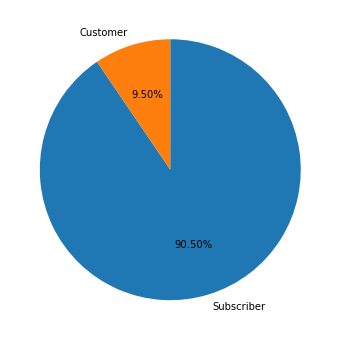

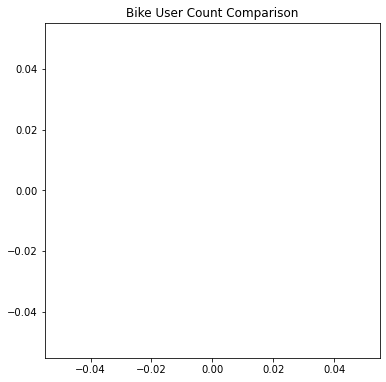

In [445]:
plt.figure(figsize=(10,6))
count_of_users= ford_bike['user_type'].value_counts()
plt.pie(count_of_users, labels = count_of_users.index, startangle = 90, counterclock = False, autopct='%1.2f%%')
plt.figure(figsize=(6,10))
plt.axis('square')
plt.title('Bike User Count Comparison');

#The visuals above shows ratio of 9:1 between Subscribers and Customers

### On which days of the week were the highest number of trips recorded?

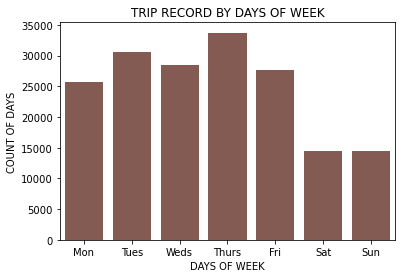

In [446]:
base_color = sb.color_palette()[5]
#type_order = ford_bike['start_weekday'].value_counts().index
sb.countplot(data=ford_bike, x='start_weekday', color=base_color)
def my_title_label(tt='tt',xl='xl',yl='yl'):
    plt.title(tt) 
    plt.xlabel(xl)
    plt.ylabel(yl);
Title='TRIP RECORD BY DAYS OF WEEK'
DaysofWeek='DAYS OF WEEK'
CountofDays='COUNT OF DAYS'
my_title_label(Title, DaysofWeek, CountofDays)

#The visuals above shows that more trips were recorded on thursdays followed by tuesdays.
#It can also be observed that the weekend days(Saturday and Sunday) recorded the lowest number of trips...
#Could it be that the rides are often used to work? and only few work on weekends.

### What percent of each gender is observed for our trips record?

In [447]:
## What is the count of each gender
ford_bike.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

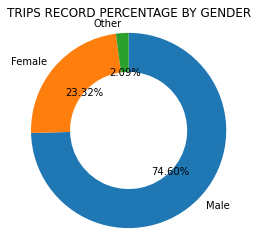

In [448]:
sorted_counts = ford_bike['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%', wedgeprops = {'width' : 0.4}),
plt.axis('square'),
plt.title('TRIPS RECORD PERCENTAGE BY GENDER');

### In which month of the year were the highest number of trips recorded?

Text(0, 0.5, 'Count_of_Months')

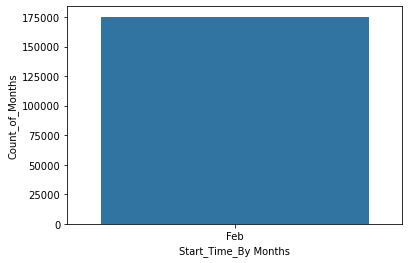

In [449]:
 
base_color = sb.color_palette()[0]
sb.countplot(data=ford_bike, x='start_year_month', color=base_color)
plt.xlabel('Start_Time_By Months')
plt.ylabel('Count_of_Months')

#The visual above shows our dataset consist mainly of trips underwent in the month of february 2019.
#We can further confirm this by checking the value count of the start_year_month column

In [450]:
ford_bike['start_year_month'].value_counts()

Feb    175147
Name: start_year_month, dtype: int64

### Which top 10 Bikes underwent the highest and least number of trips?

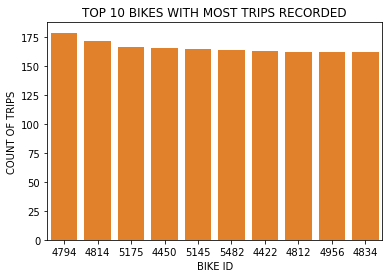

In [451]:
type_order = ford_bike['bike_id'].value_counts().head(10).index
base_color = sb.color_palette()[1]
sb.countplot(data=ford_bike, x='bike_id', order =type_order, color=base_color)
Title='TOP 10 BIKES WITH MOST TRIPS RECORDED'
xlabel='BIKE ID'
ylabel='COUNT OF TRIPS'
my_title_label(Title, xlabel,ylabel)

#The above visual shows the Bike ID with the highest trip record

#As seen above, the Bike with ID(4794) recorded the highest number of trips
##Now we will check out the Bikes with the least trips record

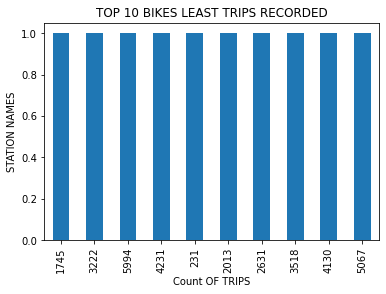

In [452]:
ford_bike.bike_id.value_counts(ascending=False).tail(10).plot.bar()
plt.title('TOP 10 BIKES LEAST TRIPS RECORDED')
plt.ylabel('STATION NAMES')
plt.xlabel('Count OF TRIPS');

### Which start and end stations are the most frequently used?

In [453]:
#What is the total number of unique start stations that  we have on record?
ford_bike['start_station_name'].nunique()

329

In [454]:
#Our check shows we have 329 station names on record

In [455]:
ford_bike.start_station_name.unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'Market St at Dolores St', 'Grove St at Masonic Ave',
       'Frank H Ogawa Plaza', '4th St at Mission Bay Blvd S',
       'Palm St at Willow St', 'Washington St at Kearny St',
       'Post St at Kearny St', 'Jones St at Post St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       'Valencia St at 21st St', 'Bancroft Way at College Ave',
       'Howard St at Mary St', '22nd St at Dolores St',
       'Laguna St at Hayes St', '5th St at Folsom',
       'Telegraph Ave at 23rd St', 'Page St at Scott St',
       'Lake Merritt BART Station', 'West St at 40th St',
       'The Embarcadero at Sansome St', 'Folsom St at 9th St',
       'University Ave at Oxford St', 'MLK Jr Way at University Ave',
       'The Embarcadero at Bryant St', '17th St at Valencia St',
       'Valencia St at 16th St', 'Valencia St at 22nd St',
       'Franklin Square', 'San Pablo Ave at MLK Jr Way',
       '19th St at Mission 

In [456]:
#What are the top 10 of the most used start stations?

top10_start_station = ford_bike['start_station_name'].value_counts().index[:10]

In [457]:
top10_start_station

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Howard St at Beale St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)'],
      dtype='object')

In [458]:
#Lets have a datatable for our top 10 stations only

top10_start_station_df = ford_bike.loc[ford_bike['start_station_name'].isin(top10_start_station)]

In [459]:
top10_start_station_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_weekday,end_weekday,year_of_birth,age,start_year_month,end_year_month
66927,534,2019-02-20 08:22:28.838,2019-02-20 08:31:22.932,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,22.0,Howard St at Beale St,37.789756,...,Subscriber,1970-01-01 00:00:00.000001973,Male,No,Weds,Weds,1973,46,Feb,Feb
63388,164,2019-02-20 15:12:15.284,2019-02-20 15:14:59.990,58.0,Market St at 10th St,37.776619,-122.417385,383.0,Golden Gate Ave at Franklin St,37.780787,...,Subscriber,1970-01-01 00:00:00.000001989,Male,No,Weds,Weds,1989,30,Feb,Feb
65041,816,2019-02-20 10:10:53.886,2019-02-20 10:24:30.399,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,Subscriber,1970-01-01 00:00:00.000001980,Male,No,Weds,Weds,1980,39,Feb,Feb
34317,252,2019-02-24 04:07:37.220,2019-02-24 04:11:49.311,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,Subscriber,1970-01-01 00:00:00.000001994,Male,No,Sun,Sun,1994,25,Feb,Feb
171077,546,2019-02-04 06:42:19.622,2019-02-04 06:51:26.020,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,77.0,11th St at Natoma St,37.773507,...,Subscriber,1970-01-01 00:00:00.000001984,Male,No,Mon,Mon,1984,35,Feb,Feb


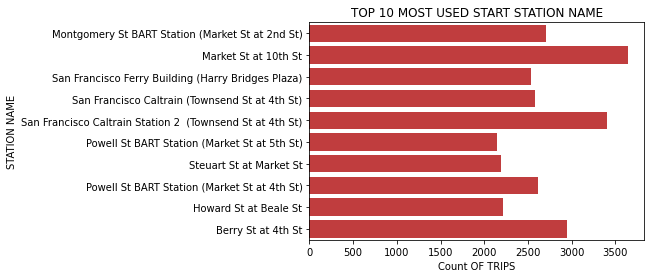

In [460]:

base_color = sb.color_palette()[3]
sb.countplot(data=top10_start_station_df, y='start_station_name', color=base_color)
plt.title('TOP 10 MOST USED START STATION NAME')
plt.ylabel('STATION NAME')
plt.xlabel('Count OF TRIPS');

#The above gives insight on the top 10 start stations. We would see if this stations would also be the top 10 end stations

### What are the most frequently used end stations?

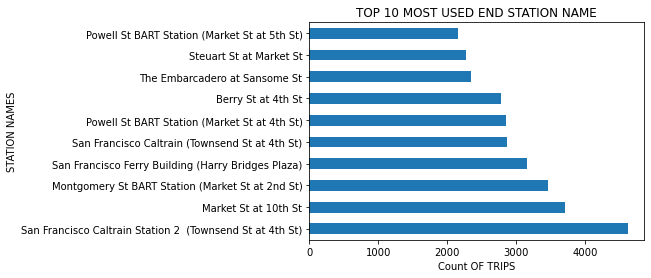

In [461]:
ford_bike.end_station_name.value_counts(ascending=False).head(10).plot.barh()
plt.title('TOP 10 MOST USED END STATION NAME')
plt.ylabel('STATION NAMES')
plt.xlabel('Count OF TRIPS');

#San Francisco Caltrain station 2 appears to be the busiest end station while Market Station is the busiest start station
#Further investigation may give us an insight as to the raeson for thae observation made above.

### What is the age distribution of riders for the top 10 start stations?

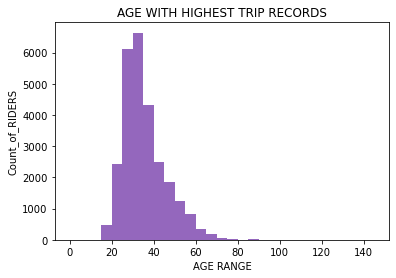

In [462]:
bins = np.arange(0, top10_start_station_df['age'].max()+5, 5)
base_color = sb.color_palette()[4]
plt.hist(data=top10_start_station_df, x='age', bins=bins, color=base_color)
plt.title('AGE WITH HIGHEST TRIP RECORDS')
plt.xlabel('AGE RANGE')
plt.ylabel('Count_of_RIDERS');

#The above histogram plot show a top peak for riders within the age of 30 to 35. A noticeable gradual drop can be seen as the age increases.

## Bivariate Exploration


### Is there a positive correlation between Age and trip Duration?

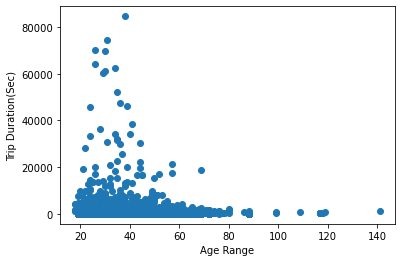

In [463]:
plt.scatter(data = top10_start_station_df, x = 'age', y = 'duration_sec');
plt.ylabel('Trip Duration(Sec)')
plt.xlabel('Age Range');

#The above plot shows a negative correlation between age and trip duration.

### Whats the count of User types by Gender?

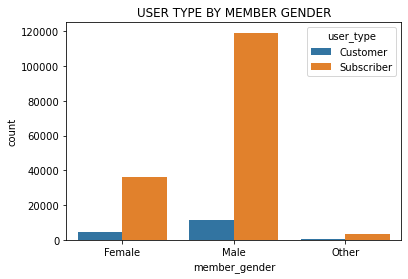

In [464]:
sb.countplot(data = ford_bike, x = 'member_gender', hue = 'user_type')
plt.title('USER TYPE BY MEMBER GENDER');

#The trend above shows there are higher number of subscribers thn customers for both gender and similar trend for the other category.

### How many trips were recorded by each gender category for the different days of the week?

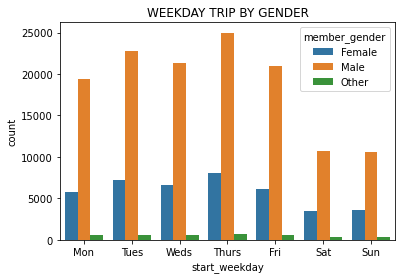

In [465]:
sb.countplot(data = ford_bike, x = 'start_weekday', hue = 'member_gender')
plt.title('WEEKDAY TRIP BY GENDER');

#Our plot shows the weekend (Saturday and Sunday) has the least record with the males recording more trips than females.

### How many trips were recorded by each user category for the different days of the week?

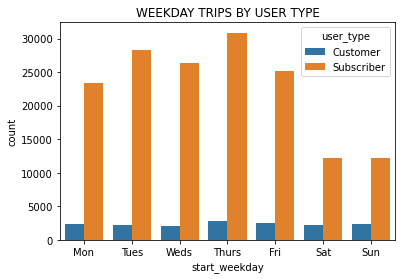

In [466]:
sb.countplot(data = ford_bike, x = 'start_weekday', hue = 'user_type')
plt.title('WEEKDAY TRIPS BY USER TYPE');

#Our plot shows the weekend (Saturday and Sunday) has the least record with the subscribers recording more trips than females.

## Multivariate Exploration


### What's the Trip duration for the two user types at the top 10 start stations?

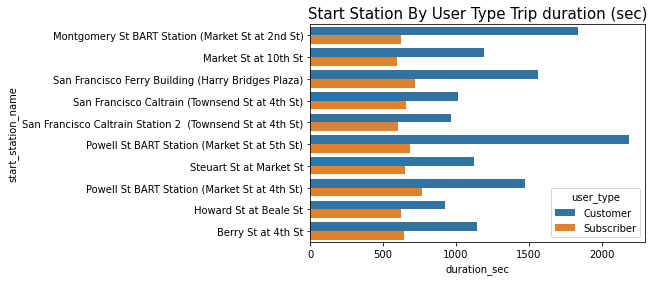

In [467]:
sb.barplot(data=top10_start_station_df, y='start_station_name', x='duration_sec', ci=None, hue='user_type', orient='h')
plt.title('Start Station By User Type Trip duration (sec)', fontsize=15);

#Surprisingly!, as against previous trends, here we have the customers having the longer trip duration records.
#There is probably a reason why subscribers are undergoing shorter trips compared to the customers...
#...Could this be related to pricing?
#Also, the subscribers seem to have a regular trip duration for all stations compared to the irregular trend for customers

### Is there a difference in age range of the different user types for the top 10 start stations?

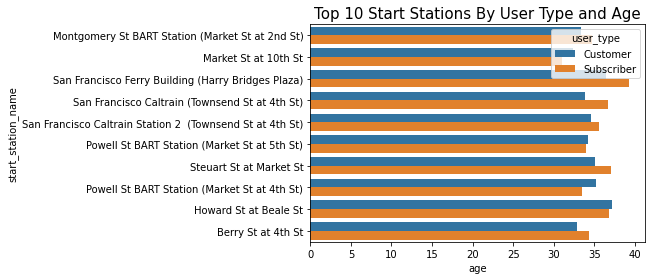

In [468]:
sb.barplot(data=top10_start_station_df, y='start_station_name', x='age', ci=None, hue='user_type', orient='h')
plt.title('Top 10 Start Stations By User Type and Age', fontsize=15);

#The plot above shows a close relationship for age range of the two users at the top 10 start stations

### What's the relationship between Age range, Trip Duration and User Type?

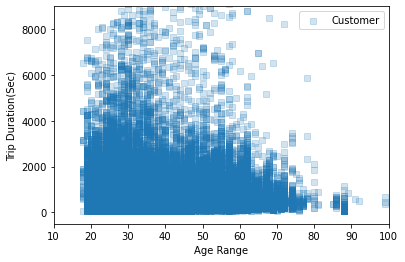

In [469]:
markers = {'Customer': 's'}
for marks in markers:
    plt.scatter(ford_bike['age'], ford_bike['duration_sec'], marker = markers[marks], alpha=0.2)
    plt.axis([10, 100, -500, 9000])
    plt.legend(['Customer','Subscriber'])
    plt.ylabel('Trip Duration(Sec)')
    plt.xlabel('Age Range')
plt.show();


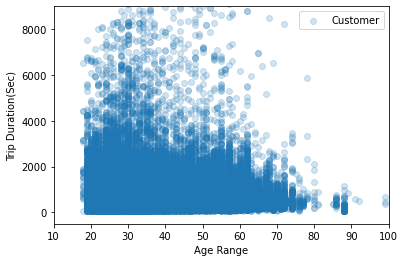

In [470]:
markers = {'Subscriber': 'o'}
for marks in markers:
    plt.scatter(ford_bike['age'], ford_bike['duration_sec'], marker = markers[marks], alpha=0.2)
    plt.axis([10, 100, -500, 9000])
    plt.legend(['Customer','Subscriber'])
    plt.ylabel('Trip Duration(Sec)')
    plt.xlabel('Age Range')
plt.show();


> The above plots show a similar trend for Customers and Subscribers.

In [471]:
ford_bike.to_csv('ford_bike_df')

## Conclusions


>The visual exploration has been carried out on the Ford Gobike dataset and the following are some of my findings:

>1. The dataset is a bike trip records for February 2019 
>2. There are more trips record for males than females. 
>3. There are more trip records for those who subscribe to the trip service than customers
>4. The customers embarked on longer trips compared to those who subscribed to the service.
>5. People within the age of 30 to 35 have the highest trip records. 
>6. There is a noticeable sharp decline in patronage from age 35 and above.
>7. There is a similar age sistribution between the subscribers and customers.
>8. The weekend has the lowest trips record compared to other days of the week 